# Distributions

Graphs showing distributions from random values (exponential and normal distributions).  Let's first generate some random data in a numpy array. 

In [2]:
import numpy as np
array = np.random.rand(1000,10)
print(array.mean(), array.sum())

0.49463882614640525 4946.388261464052


In [3]:
import pandas as pd
df = pd.DataFrame(array)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.507621,0.502210,0.495758,0.493452,0.493528,0.487222,0.481470,0.495448,0.505877,0.483802
std,0.288582,0.280877,0.288617,0.289007,0.288124,0.291243,0.288612,0.291877,0.292427,0.289569
min,0.000613,0.000316,0.001858,0.001367,0.000208,0.000205,0.000556,0.000220,0.001514,0.001077
25%,0.259064,0.274133,0.243317,0.248141,0.252274,0.236647,0.238001,0.247661,0.248127,0.242803
50%,0.500026,0.493936,0.492128,0.487235,0.489279,0.476753,0.470835,0.496696,0.501744,0.460349
75%,0.754062,0.732353,0.757196,0.742786,0.729931,0.733563,0.718648,0.745625,0.764072,0.741372
max,0.998488,0.999323,0.999276,0.997745,0.999705,0.999614,0.998399,0.999532,0.998564,0.999765


Pandas sum function will add up across rows. The sum values approach a normal distribution because the sum is based on random underlying distributions. (Central Limit Theorem)

In [4]:
sum = df.sum(axis=1)
sum.describe()

count    1000.000000
mean        4.946388
std         0.917599
min         1.946609
25%         4.315829
50%         4.919926
75%         5.568603
max         7.975874
dtype: float64

In [5]:
sum.tail()

995    2.907655
996    4.913944
997    2.721153
998    3.413097
999    3.407609
dtype: float64

Let's now create another series that multiples all row values. This should end up as a log normal distribution, since we are multiplying series of randomly distributed values.  There does not seem to be a pandas function for multiplying rows akin to sum() so we have to do it ourselves. 

In [6]:
product = df[df.columns[0]].copy()
product.describe()

count    1000.000000
mean        0.507621
std         0.288582
min         0.000613
25%         0.259064
50%         0.500026
75%         0.754062
max         0.998488
Name: 0, dtype: float64

In [7]:
for col in df.columns[1:]:
    product *= df[col]
product.describe()

count    1.000000e+03
mean     9.604468e-04
std      4.257752e-03
min      5.194498e-11
25%      5.132359e-06
50%      5.776464e-05
75%      3.764205e-04
max      8.077791e-02
Name: 0, dtype: float64

In [8]:
df['sum'] = sum
df['product'] = product
df.describe()

,0,1,2,3,4,5,6,7,8,9,sum,product
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,0.507621,0.502210,0.495758,0.493452,0.493528,0.487222,0.481470,0.495448,0.505877,0.483802,4.946388,9.604468e-04
std,0.288582,0.280877,0.288617,0.289007,0.288124,0.291243,0.288612,0.291877,0.292427,0.289569,0.917599,4.257752e-03
min,0.000613,0.000316,0.001858,0.001367,0.000208,0.000205,0.000556,0.000220,0.001514,0.001077,1.946609,5.194498e-11
25%,0.259064,0.274133,0.243317,0.248141,0.252274,0.236647,0.238001,0.247661,0.248127,0.242803,4.315829,5.132359e-06
50%,0.500026,0.493936,0.492128,0.487235,0.489279,0.476753,0.470835,0.496696,0.501744,0.460349,4.919926,5.776464e-05
75%,0.754062,0.732353,0.757196,0.742786,0.729931,0.733563,0.718648,0.745625,0.764072,0.741372,5.568603,3.764205e-04
max,0.998488,0.999323,0.999276,0.997745,0.999705,0.999614,0.998399,0.999532,0.998564,0.999765,7.975874,8.077791e-02


In [9]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,sum,product
995,0.532136,0.630477,0.078281,0.853644,0.413846,0.039532,0.010395,0.031577,0.217447,0.100320,2.907655,2.626396e-09
996,0.237874,0.871379,0.970640,0.118128,0.277902,0.061225,0.374241,0.603287,0.902486,0.496782,4.913944,4.093252e-05
997,0.759189,0.345416,0.271734,0.522979,0.039274,0.155079,0.298111,0.250849,0.040164,0.038358,2.721153,2.614903e-08
998,0.163301,0.572931,0.304730,0.260644,0.762432,0.143651,0.152378,0.284370,0.012940,0.755720,3.413097,3.448709e-07
999,0.079609,0.458640,0.510821,0.626569,0.220200,0.442272,0.108296,0.641773,0.037173,0.282255,3.407609,8.299373e-07


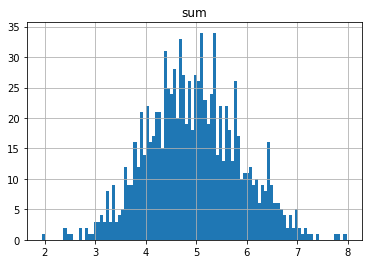

In [11]:
import matplotlib.pyplot as plt
# Display figures inline. 
%matplotlib inline
df.hist(bins=100, column="sum")
plt.show()

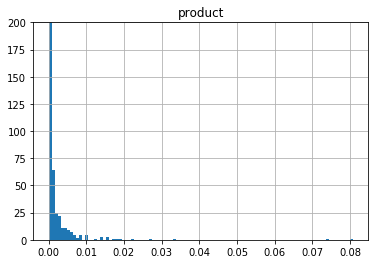

In [18]:
import matplotlib.pyplot as plt
df.hist(bins=100, column="product")
plt.ylim(top=200)
plt.show()

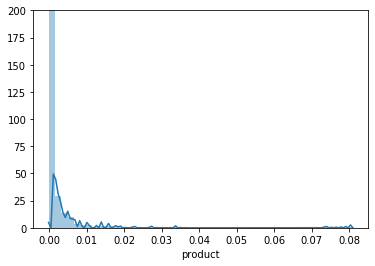

In [19]:
import seaborn as sns
plt.ylim(top=200)
sns.distplot(df["product"])

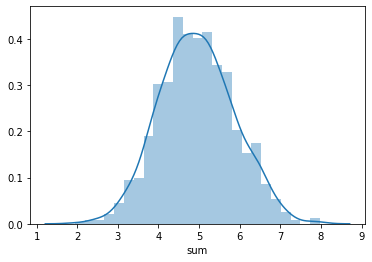

In [14]:
sns.distplot(df["sum"])